In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix
import random
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_15_Resampled_Data.csv")

In [3]:
df.head()

,Unnamed: 0,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
0,0,0.0,4.125014,5.841922e-01,-5.446979,-0.835088,6.946014e+00,1.0,1.0,3.0,3.0,1.0,0.0
1,1,0.0,4.148253,9.999992e-07,-0.651148,-0.000639,9.999995e-07,0.5,2.0,5.0,2.0,0.0,0.0
2,2,0.0,4.142773,5.841922e-01,-0.651148,-1.517376,9.999995e-07,0.5,2.0,5.0,1.0,2.0,0.0
3,3,0.0,4.145137,5.841922e-01,0.000000,-0.895270,9.999995e-07,0.5,2.0,3.0,1.0,2.0,0.0
4,4,0.0,4.114886,5.841922e-01,-4.324716,-0.034032,9.999995e-07,0.5,2.0,2.0,1.0,1.0,0.0


In [4]:
df = df.iloc[:,1:]

In [5]:
df['Label-0/1'].value_counts()

0.0    414130
1.0    414130
Name: Label-0/1, dtype: int64

In [6]:
X = df.drop(['Label-0/1'], axis = 1)
y = df['Label-0/1']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
    random_state = 42,
    test_size = 0.2)

In [8]:
rf = RandomForestClassifier()

In [9]:
params_grid = {
    'max_depth': [10,50,100],
    'n_estimators':[10,55,100]
}

In [14]:
grid_rf = GridSearchCV(rf, params_grid, scoring = 'accuracy' , refit = True, n_jobs = 1).fit(X_train, y_train)

In [15]:
accuracy=grid_rf.best_score_*100
print("Accuracy for our training dataset",accuracy)

Accuracy for our training dataset 96.72249650753179


In [16]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth = 100, max_features = 'log2').fit(X_train, y_train)

In [17]:
rf_preds = rf_clf.predict(X_train)

In [18]:
accuracy_score(y_true = y_train, y_pred = rf_preds)
print("Accuracy for our training dataset",accuracy)

Accuracy for our training dataset 96.72249650753179


In [19]:
recall_score = recall_score(y_true = y_train, y_pred = rf_preds)
print("Recall for our testing dataset",recall_score)

Recall for our testing dataset 0.998445203225524


In [20]:
cm= confusion_matrix(y_train,rf_preds)

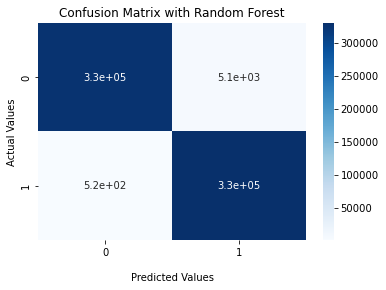

In [21]:
ax = sns.heatmap(cm, annot = True, cmap = 'Blues')
ax.set_title("Confusion Matrix with Random Forest")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values")
plt.show()